In [ ]:
# This program will use an artificial neural network called long short term (LSTM)
# will be used to predict the closing stock price of a corporation (Apple) using the past 60 days stock price

In [ ]:
# required libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# get the stock quote
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
# show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402625,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469279,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607712,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.143257,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.698891,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,65.866318,137310400


In [ ]:
#!pip install yfinance
import yfinance as yf

In [ ]:
# get the nos of rows and columns in the data set
df.shape

(2002, 6)

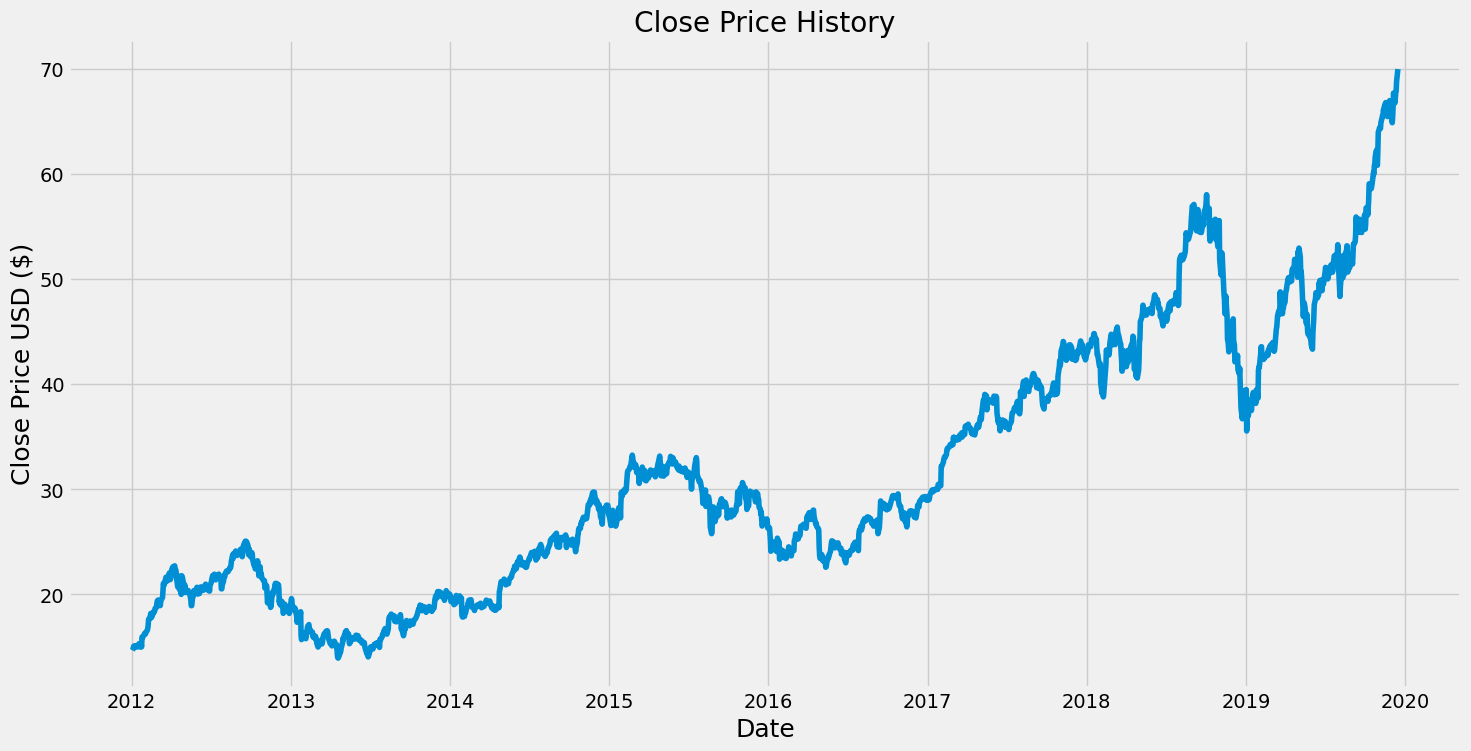

In [ ]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# create a new dataframe with only the 'close' column
data = df.filter(['Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1602

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [ ]:
# create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



In [ ]:
# convert the x_train and y_train to numpy arrays so we can use them to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# respahe the data because LSTM requires a 3D data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [ ]:
# building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - loss: 0.0013


In [ ]:
# create the testing dataset
# create a new arrray of scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
# convert the data to a numpy array so that it can be used in the LSTM model
x_test = np.array(x_test)

In [ ]:
# reshape to a 3D array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# get the model's predicted price values for x_test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# we want predictions to contain the same values as the y_test data set
# based off of the x_test data set

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
# get the root mean squared error(RMSE) to evaluate the models performaance
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.551474895477295

<ipython-input-27-011cbfef13b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


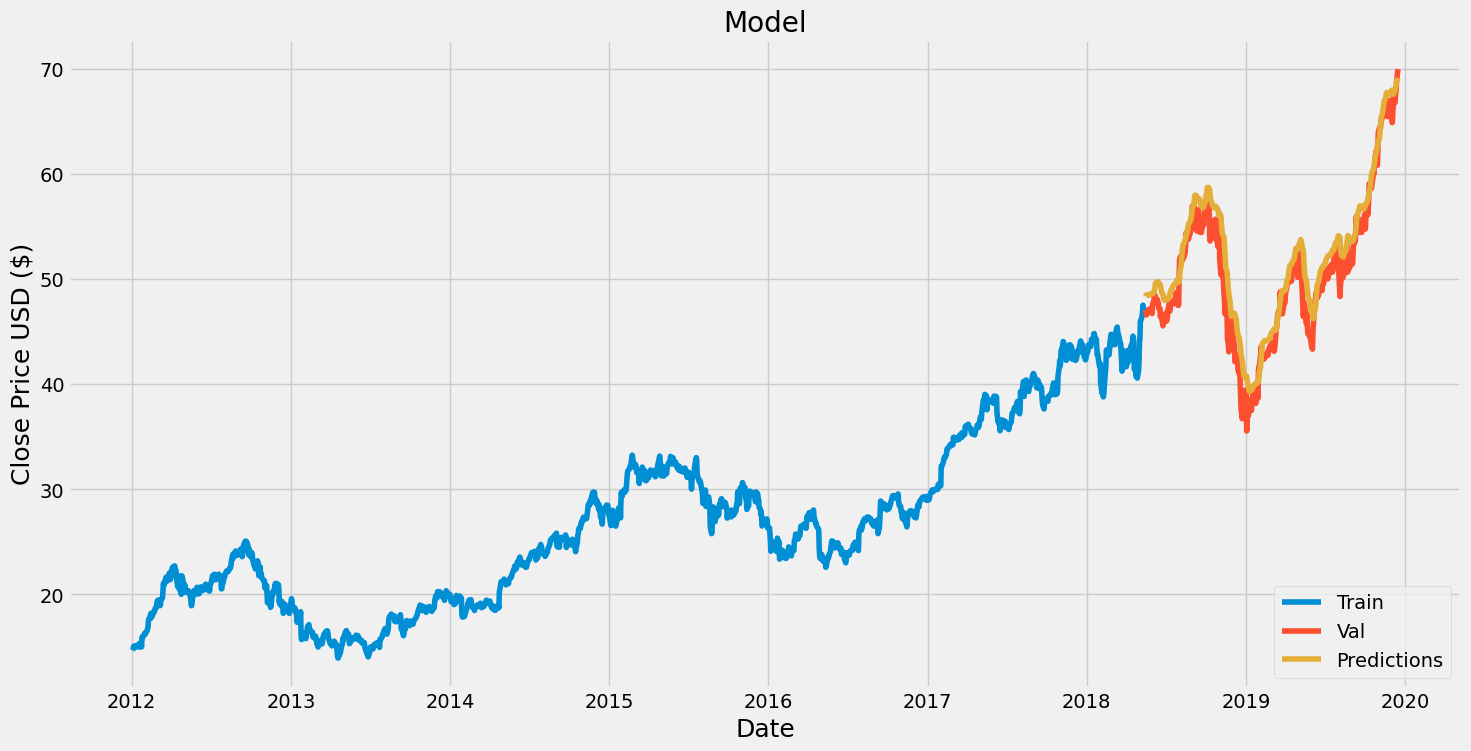

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# show the actual price and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,48.350826
2018-05-17,46.747501,48.449520
2018-05-18,46.577499,48.475216
2018-05-21,46.907501,48.443581
2018-05-22,46.790001,48.444218
...,...,...
2019-12-10,67.120003,68.043182
2019-12-11,67.692497,68.236282
2019-12-12,67.864998,68.489838


In [ ]:
# get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2022-12-15')
# create a new dataframe
new_df = apple_quote.filter(['Close'])
# get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
X_test = []
# append the past 60 days
X_test.append(last_60_days_scaled)
# convert the X_test data set to a numpy array
X_test = np.array(X_test)
# reshape the data to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[130.32861]]
